## Observations and Insights 

1. The study was conducted on a roughly equal number of male and female mice.
2. There seem to be no significant outliers in the dataset for the Tumor Volumes compared to each of the 4 Drug Regimens specified.
3. There is a slight positive correlation between the weight of the mouse and the volume of the tumor.

In [85]:
# Dependencies and Setup
from typing_extensions import dataclass_transform
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_complete_df =pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")

# Display the data table for preview
data_complete_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
# Checking the number of mice.
miceList= data_complete_df['Mouse ID'].unique()
totalMice = len(miceList)
totalMice


249

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupMiceList = data_complete_df[data_complete_df.duplicated(['Mouse ID', 'Timepoint'])]
dupMiceList['Mouse ID'].value_counts()



g989    5
Name: Mouse ID, dtype: int64

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = data_complete_df.loc[data_complete_df['Mouse ID'] == "g989"]
g989_mouse



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
withoutDupes_df = data_complete_df.loc[data_complete_df['Mouse ID']!="g989"]
withoutDupes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
withoutDupes_df['Mouse ID'].count()

1880

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
withoutDupes_df['Tumor Volume (mm3)'].describe()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumorVol= withoutDupes_df['Tumor Volume (mm3)']
mean = np.mean(tumorVol)
median = np.median(tumorVol)
vari = np.var(tumorVol)
std  = np.std(tumorVol)
sem_ = st.sem(tumorVol)
# Assemble the resulting series into a single summary dataframe.
data = [{"Mean" : mean,
        "Median":median,
        "Variance":vari,
        "Standard Deviation": std,
        "SEM": sem_}]

sum_df = pd.DataFrame(data)
sum_df


,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.42064,8.911826,0.205591


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorVolDrugs= withoutDupes_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
meanDrug = tumorVolDrugs.mean()
medianDrug = tumorVolDrugs.median()
varDrug = tumorVolDrugs.var()
stdDrug  = tumorVolDrugs.std()
semDrug = tumorVolDrugs.sem()

dataDrug = {
        "Mean" : meanDrug,
        "Median":medianDrug,
        "Variance":varDrug,
       "Standard Deviation": stdDrug,
        "SEM": semDrug
}
sumDrug_df = pd.DataFrame(dataDrug)

# Using the aggregation method, produce the same summary statistics in a single line
aggSum_df = sumDrug_df.agg(['average'])
aggSum_df

,Mean,Median,Variance,Standard Deviation,SEM
average,50.975982,49.902123,47.85844,6.821103,0.502785


## Bar and Pie Charts

Text(0, 0.5, '# of Timepoints')

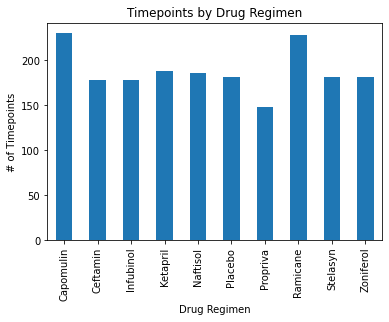

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drugType = withoutDupes_df.groupby('Drug Regimen')
timepoints = drugType['Timepoint'].count()
bar= timepoints.plot(kind = 'bar', title="Timepoints by Drug Regimen")
bar.set_ylabel("# of Timepoints")



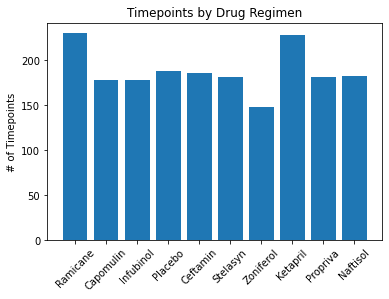

In [46]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = withoutDupes_df['Drug Regimen'].unique()
plt.bar(x_axis,timepoints)
plt.ylabel("# of Timepoints")
plt.title("Timepoints by Drug Regimen")
plt.xticks(rotation = 45)
plt.show()


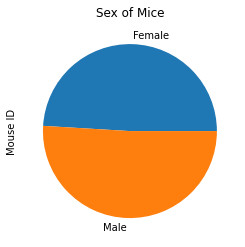

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouseType = withoutDupes_df.groupby('Sex')
sex = mouseType['Mouse ID'].count()
bar= sex.plot(kind = 'pie', title="Sex of Mice")


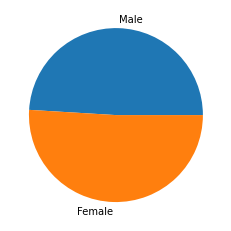

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_axis = withoutDupes_df['Sex'].unique()
plt.pie(sex,labels=sex_axis)

plt.show()


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
miceTimes = data_complete_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lastTimes_df = pd.merge(data_complete_df,miceTimes, how='right')
lastTimes_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
40317,y769,Ceftamin,Female,6,27,45,68.594745,4
40318,y865,Ceftamin,Male,23,26,45,64.729837,3
40319,z581,Infubinol,Female,24,25,45,62.754451,3
40320,z795,Naftisol,Female,13,29,45,65.741070,3


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
regimens_df = lastTimes_df.loc[(lastTimes_df['Drug Regimen'] == 'Capomulin') |
                                  (lastTimes_df['Drug Regimen'] == 'Ramicane')|
                                  (lastTimes_df['Drug Regimen'] == 'Infubinol')|
                                 ( lastTimes_df['Drug Regimen'] == 'Ceftamin')] 
regimens_df

tumorSeries = regimens_df['Tumor Volume (mm3)']

quartiles = tumorSeries.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq   
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lower_bound)
upper_bound



14.168559344999998


76.68976290500001

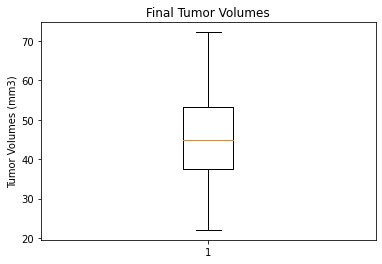

In [79]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Tumor Volumes (mm3)')
ax1.boxplot(tumorSeries)
plt.show()

## Line and Scatter Plots

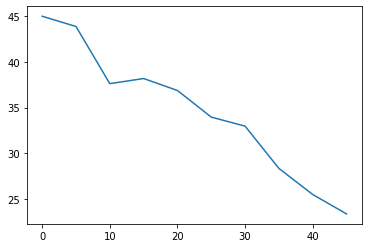

In [96]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
single_df = data_complete_df.loc[data_complete_df['Mouse ID']=='s185',:]
plt.plot(single_df['Timepoint'],single_df['Tumor Volume (mm3)'])


<function matplotlib.pyplot.show(close=None, block=None)>

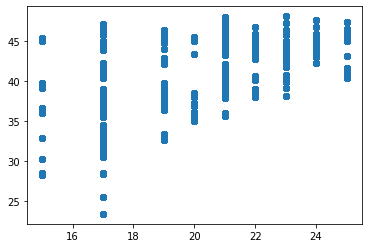

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = regimens_df.loc[regimens_df['Drug Regimen']=='Capomulin']
x_values = capomulin_df['Weight (g)']
y_values = capomulin_df['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.show



## Correlation and Regression

The correlation between weight and final tumor is 0.63


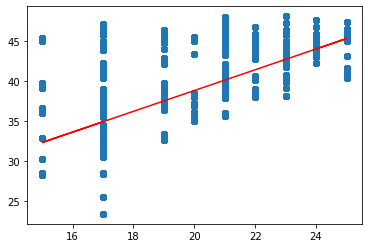

In [90]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values,y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
print(f"The correlation between weight and final tumor is {round(correlation[0],2)}")